# Basic statistics for the data descriptor 'A living catalogue of artificial intelligence datasets and benchmarks for medical decision making'

This notebook includes basic statistics of the dataset *'A living catalogue of artificial intelligence datasets and benchmarks for medical decision making'* (Version 0.1.1, see http://doi.org/10.5281/zenodo.4668570 for more information on the dataset.)

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
DATA = 'annotated-datasets.tsv'

In [3]:
df = pd.read_csv(DATA, sep='\t',  lineterminator='\n')
df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
0,Heart Disease Data Set,Classification of Coronary Artery Disease,Image classification,https://identifiers.org/ito#ITO_01160,Clinical notes / EHR data,Yes,Not described,No,Public,Not stated,...,NaN,NaN,http://arxiv.org/abs/1812.02828v1,https://archive.ics.uci.edu/ml/datasets/Heart+...,NaN,NaN,English,NaN,NaN,\r
1,Clinical data set: contains three corpora: pro...,Classifying documents as relevant or irrelevan...,Text Classification,https://identifiers.org/ito#ITO_01150,Biomedical scientfic literature,Yes,"Certainty, Uncertainty, AUC,",No,On request,Not stated,...,Not relevant,NaN,https://pubmed.ncbi.nlm.nih.gov/24954015,NaN,NaN,NaN,English,NaN,NaN,\r
2,Arizona Disease Corpus (AZDC),Information extraction,Information Extraction,https://identifiers.org/ito#ITO_00705,Biomedical scientfic literature,Yes,Not described,Not described,Public,Not stated,...,Indirectly,NaN,https://pubmed.ncbi.nlm.nih.gov/25817970,http://diego.asu.edu/index.php?downloads=yes,NaN,2009.0,English,NaN,NaN,\r
3,20 disease articles of twitter data,Not applicable,NaN,NaN,Social media data,No,Not applicable,No,Unknown,NaN,...,NaN,NaN,https://arxiv.org/abs/1711.04305,NaN,NaN,NaN,English,NaN,NaN,\r
4,2011 MetaMapped Medline Baseline,Not applicable,NaN,NaN,Biomedical scientfic literature,No,Not applicable,No,Unknown,NaN,...,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/22195220,NaN,NaN,NaN,English,NaN,NaN,\r


## Summary statistics for all identified datasets

In [4]:
number_of_identified_datasets = df.shape[0]
print(number_of_identified_datasets)

471


### How many of the identified datasets have evaluation criteria?

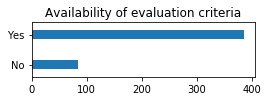

In [5]:
evaluation_criteria = pd.get_dummies(df['Has evaluation criteria?']).sum()
evaluation_criteria.plot.barh(width=0.3, figsize=(4,1), title='Availability of evaluation criteria')

In [6]:
benchmark_df_filtered_for_criteria = df[df['Has evaluation criteria?']!='No']
benchmark_df_filtered_for_accessibility = benchmark_df_filtered_for_criteria[benchmark_df_filtered_for_criteria['Accessibility']!='Unknown']
benchmark_df_filtered_for_accessibility = benchmark_df_filtered_for_accessibility[benchmark_df_filtered_for_criteria['Accessibility']!='Not available']

C:\Users\kathrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Source data type

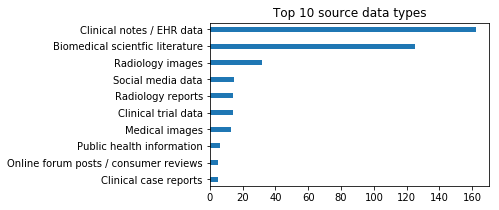

In [7]:
df['Data basis'] = df['Data basis'].str.split(';', expand=True)
source_data = pd.get_dummies(df['Data basis']).sum()

source_data = source_data.sort_values()[-10:]
source_data.plot.barh(width=0.3, figsize=(5,3), title='Top 10 source data types')


### Accessibility of datasets

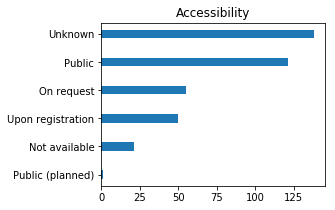

In [8]:
accessibility = pd.get_dummies(benchmark_df_filtered_for_criteria['Accessibility']).sum()
accessibility.sort_values().plot.barh(width=0.3, figsize=(4,3), title='Accessibility')

### How many of the identified datasets are relevant for clinical question-answering and information retrieval?

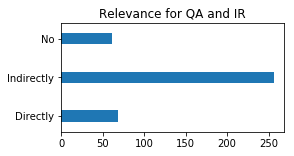

In [9]:
qa_ir = pd.get_dummies(benchmark_df_filtered_for_criteria['Relevant for QA/IR?']).sum()
qa_ir.plot.barh(width=0.3, figsize=(4,2), title='Relevance for QA and IR')

### Availability of data splits

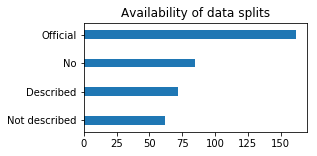

In [10]:
data_splits = pd.get_dummies(benchmark_df_filtered_for_criteria['Data splits']).sum()
data_splits.sort_values().plot.barh(width=0.3, figsize=(4,2), title='Availability of data splits')

### Tasks

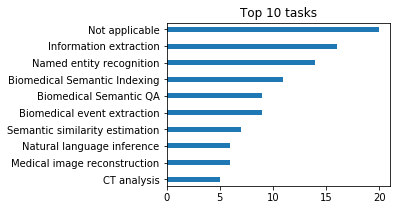

In [11]:
tasks = pd.get_dummies(df['Task']).sum()
tasks.sort_values(ascending=True).tail(10).plot.barh(width=0.3, figsize=(4,3), title='Top 10 tasks')

### Mapped tasks

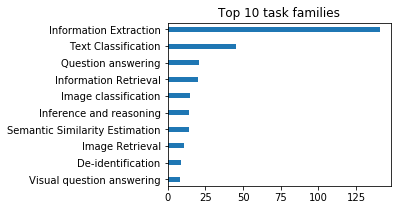

In [12]:
mapped_tasks = df['Mapped task'].str.split(';', expand=True)
mapped_tasks = mapped_tasks.melt().dropna()
mapped_tasks = pd.get_dummies(mapped_tasks['value']).sum()
mapped_tasks.sort_values(ascending=True).tail(10).plot.barh(width=0.3, figsize=(4,3), title='Top 10 task families')